In [127]:
import seaborn as sns
import pandas as pd

infile = "../img/latenciesIoT.pkl"
outfile = "../img/fig9_latenciesIoT.pdf"

print("Setup done.")

Setup done.


In [128]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 5)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [129]:
df_calls = pd.read_pickle(infile)
df_calls.head()

,pair,latency,platform,start
0,Emergency - Light Phase,629.401259,both,2021-02-11 19:57:47.281
1,Movement Plan - Light Phase,3061.210008,both,2021-02-11 19:57:43.899
2,Object Recognition - Traffic Statistic,716.629434,both,2021-02-11 19:57:40.205
3,Object Recognition - Emergency,509.570824,tinyFaaS,2021-02-11 19:57:47.288
4,Object Recognition - Movement Plan,618.993622,tinyFaaS,2021-02-11 19:57:44.034


In [130]:
rename = [
    ["Artillery - Object Recognition","Load Generator - Object Recognition"],
    ["Artillery - Traffic Sensor","Load Generator - Traffic Sensor"],
    ["Artillery - Weather Sensor","Load Generator - Weather Sensor"],
    ["Google","GCP → GCP"],
    ["tinyFaaS","tinyFaaS → tinyFaaS"],
    ["both","tinyFaaS → GCP"]
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:Artillery - Object Recognition, new:Load Generator - Object Recognition
old:Artillery - Traffic Sensor, new:Load Generator - Traffic Sensor
old:Artillery - Weather Sensor, new:Load Generator - Weather Sensor
old:Google, new:GCP → GCP
old:tinyFaaS, new:tinyFaaS → tinyFaaS
old:both, new:tinyFaaS → GCP


,pair,latency,platform,start
0,Emergency - Light Phase,629.401259,tinyFaaS → GCP,2021-02-11 19:57:47.281
1,Movement Plan - Light Phase,3061.210008,tinyFaaS → GCP,2021-02-11 19:57:43.899
2,Object Recognition - Traffic Statistic,716.629434,tinyFaaS → GCP,2021-02-11 19:57:40.205
3,Object Recognition - Emergency,509.570824,tinyFaaS → tinyFaaS,2021-02-11 19:57:47.288
4,Object Recognition - Movement Plan,618.993622,tinyFaaS → tinyFaaS,2021-02-11 19:57:44.034


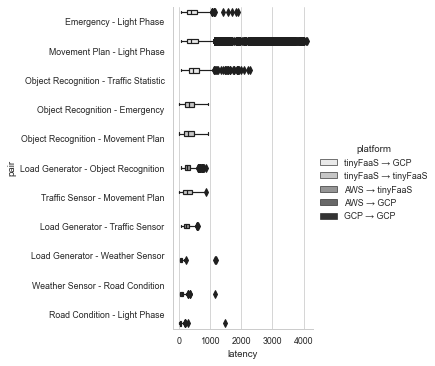

In [131]:
plot = sns.catplot(x = "latency", y = "pair", hue="platform", kind="box", data=df_calls, orient="h")

In [132]:
#Build order
classes = ["AWS → tinyFaaS", "AWS → GCP","GCP → GCP","tinyFaaS → tinyFaaS","tinyFaaS → GCP"]
myorder = ["Load Generator - Object Recognition",
           "Load Generator - Traffic Sensor",
           "Load Generator - Weather Sensor",
           "Weather Sensor - Road Condition",
           "Road Condition - Light Phase",
           "Object Recognition - Movement Plan",
           "Object Recognition - Emergency",
           "Traffic Sensor - Movement Plan",
           "Object Recognition - Movement Plan",
           "Emergency - Light Phase",
           "Movement Plan - Light Phase",
           ]



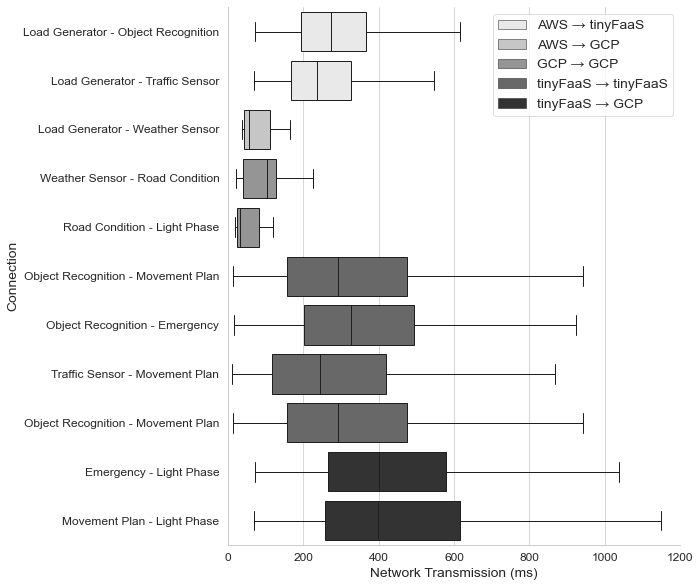

In [133]:

plot = sns.catplot(x = "latency", y = "pair", hue="platform", kind="box", sym="", data=df_calls,
                   height=8, aspect=1.1, legend=False, linewidth=1, dodge = False,
                   hue_order=classes, order=myorder)

plot.set_xlabels(label = "Network Transmission (ms)", fontsize="x-large")
plot.set_ylabels(label = "Connection", fontsize="x-large")
plot.set_yticklabels(size = 12)
plot.set_xticklabels(size = 12)

plot.set(xlim=(0, 1200))

plot.ax.legend(loc=0, fontsize="x-large")
plot.savefig(outfile)